# Naïve Bayes

### Importing libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Obtaining the data

In [4]:
data = pd.read_csv('../../Data/Assignment_dataset.csv')
data.head()

,Categorical_1,Categorical_2,Feature_1,Feature_2,Feature_3,Label
0,2,1,2824.802093,2530.517100,2717.842544,4
1,1,1,908.538051,1371.403348,1480.603380,2
2,1,0,4264.296027,4085.271732,4433.111426,4
3,2,1,650.809883,1537.163058,1002.764724,0
4,2,1,743.972385,1580.194147,992.426731,0


### Classifying the features and obtaining the classes

In [5]:
data.columns

Index(['Categorical_1', 'Categorical_2', 'Feature_1', 'Feature_2', 'Feature_3',
       'Label'],
      dtype='object')

In [6]:
categorical_features = []
continuous_features = []
for feature in data.columns:
    if feature == 'Label':
        classes = np.unique(data['Label'])
    if data[feature].dtype in ['int32' , 'int64']:
        categorical_features.append(feature)
    else:
        data[feature] = (data[feature]-data[feature].min())/(data[feature].max() - data[feature].min())
        continuous_features.append(feature)

print("Classes :", classes)
print("Categorical features :",categorical_features)
print("Continuous features :",continuous_features)

Classes : [0 1 2 3 4]
Categorical features : ['Categorical_1', 'Categorical_2', 'Label']
Continuous features : ['Feature_1', 'Feature_2', 'Feature_3']


### Splitting the dataset with a 90:10 ratio

In [7]:
np.random.seed(2)
train_data, test_data = train_test_split(data, test_size = 0.1)

train_data = train_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)
train_data.head()

,Categorical_1,Categorical_2,Feature_1,Feature_2,Feature_3,Label
0,0,1,0.056481,0.086477,0.044973,2
1,0,1,0.160744,0.169892,0.170704,0
2,0,0,0.393865,0.299678,0.387429,1
3,1,1,0.003347,0.033627,0.006564,0
4,2,1,0.261205,0.017459,0.216015,1


### Visualizing the distribution of the features

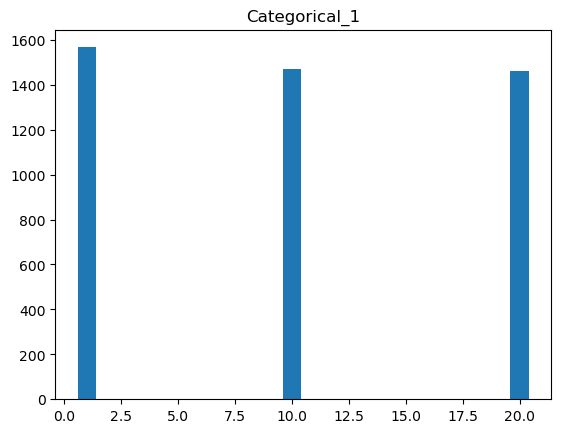

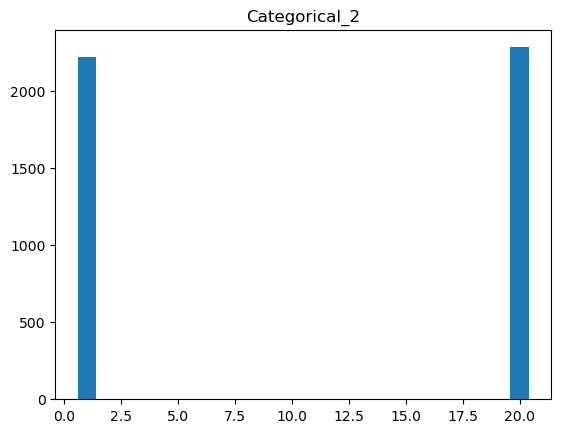

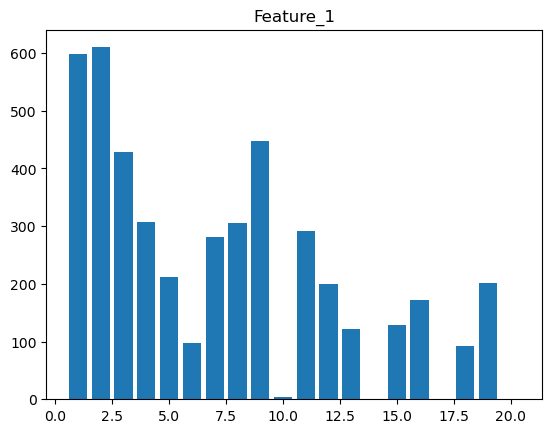

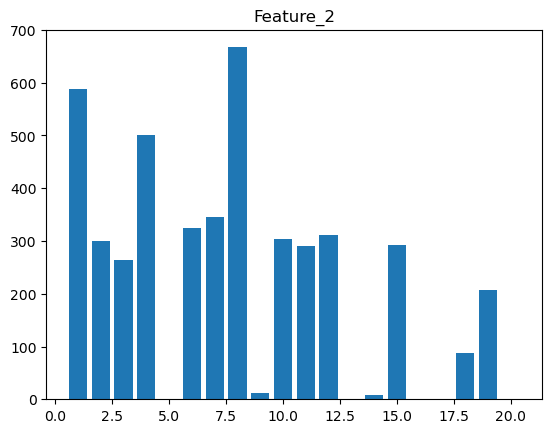

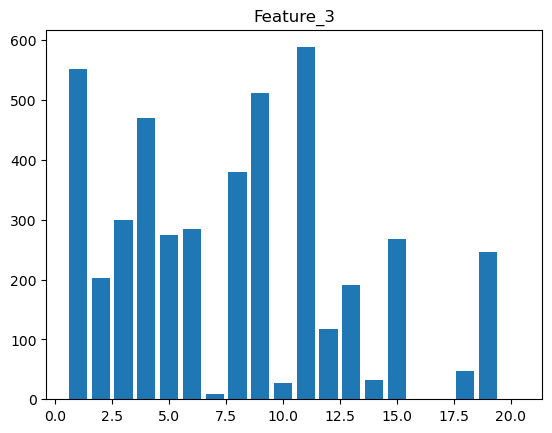

In [8]:
def plot_feature_bar_graph(data,feature,num_bins):
    bins = np.linspace(data[feature].min(), data[feature].max(), num_bins)
    bins, count = np.unique(np.digitize(data[feature],bins), return_counts = True)

    plt.title(feature)
    plt.bar(bins, count)
    plt.show()

for feature in data.columns:
    if feature != 'Label':
        plot_feature_bar_graph(train_data, feature, 20)

### Defining the necessary functions

In [9]:
# Calculates the value of a gaussian at a point x with a certian mean and variance
def gaussianLikelihood(x, mean, var):
    coeff = 1/np.sqrt(2*np.pi*var)
    return coeff* np.exp(-0.5*(x-mean)**2/var)

# Calculates the KDE likelihood for a certain feature
def getKDELikelihood(x, data, feature, bandwidth = 0.001):
    return np.mean(gaussianLikelihood(x,data[feature],bandwidth))

# Plots the gaussian likelihood for a certain feature
def plotGaussianLikelihood(data, feature):
    x_vals = np.linspace(data[feature].min(), data[feature].max(), 1000)
    plt.plot(x_vals,gaussianLikelihood(x_vals, data[feature].mean(), data[feature].var()), label = 'Gaussian Likelihod')
    
# Plots the KDE likelihood for a certain feature
def plotKDELikelihood(data, feature, bandwidth=0.001):
    x_vals = np.linspace(data[feature].min(), data[feature].max(), 1000)
    likelihood = 0
    for i in range(len(data[feature])):
        likelihood += gaussianLikelihood(x_vals, data[feature][i], bandwidth)

    plt.plot(x_vals, likelihood, label = 'KDE Likelihood')
    return likelihood

# Calculates the likelihood of a data point for a specific feature and class
def getGaussianLikelihoodClasswise(x, data, feature, cls):
    data_cls = data[data['Label'] == cls][feature].values
    return gaussianLikelihood(x, data_cls.mean(), data_cls.var())

# Vectorized calculation of KDE Likelihood
def getKDELikelihoodClasswise(x, data, feature, cls, bandwidth = 0.001):
    data_cls = data[data['Label'] == cls][feature].values
    
    # gaussianLikelihood function calculates the gaussian for a specific x value for all the values in data_cls (the means)
    # gaussianLikelihood returns an array of all the likelihoods to which we apply np.mean() to get the KDE likelihood
    # This vectorizes the calculation and speeds up the model
    likelihood = np.mean(gaussianLikelihood(x,data_cls,bandwidth)) 
    return likelihood

# Plots the KDE Likelihood of a certain feature for a specific class
def plotKDELikelihoodClasswise(data, feature, cls, bandwidth = 0.001):
    data_cls = data[data['Label'] == cls][feature].values
    x_vals = np.linspace(data_cls.min(), data_cls.max(), 1000)
    # We have to manually calculate the KDE here because the vectorized KDE function doesn't work when the x is also an array
    likelihood = 0
    for i in range(len(data_cls)):
        likelihood += gaussianLikelihood(x_vals, data_cls[i], bandwidth)

    plt.plot(x_vals, likelihood, label = f"Class {cls}")
    return likelihood

# Plots the Guassian Likelihood of a certain feature for a specific class
def plotGaussianLikelihoodClasswise(data, feature, cls):
    data_cls = data[data['Label'] == cls][feature].values
    x_vals = np.linspace(data[feature].min(), data[feature].max(), 1000)
    likelihood = gaussianLikelihood(x_vals, data_cls.mean(), data_cls.var())
    plt.plot(x_vals, likelihood, label = f"Class {cls}")
    return likelihood


### Plotting the likelihoods

#### Gaussian

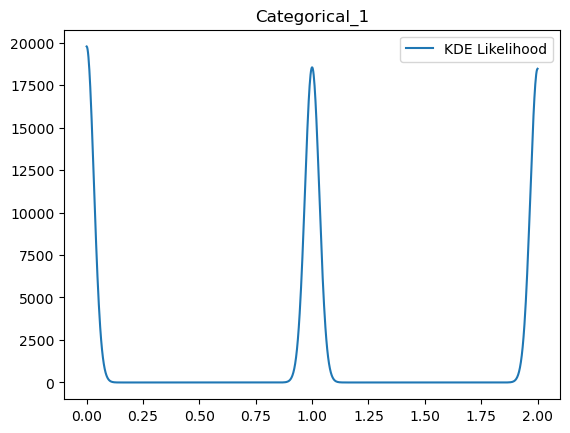

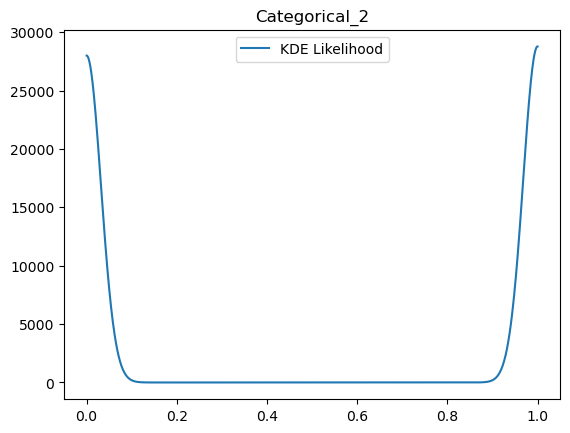

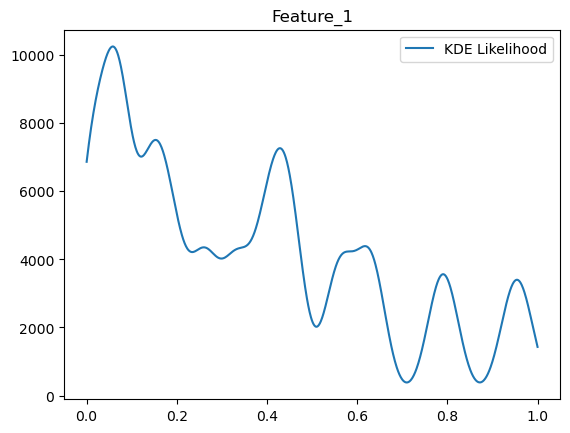

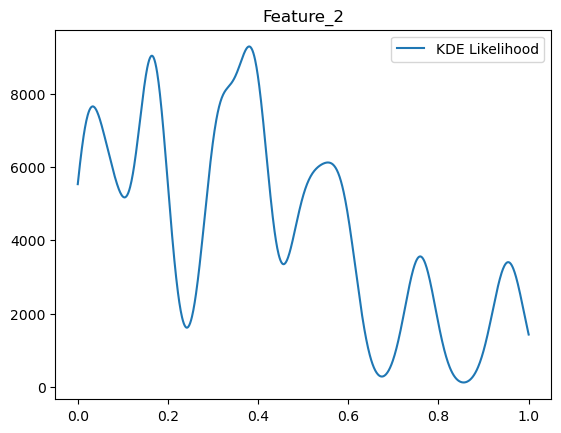

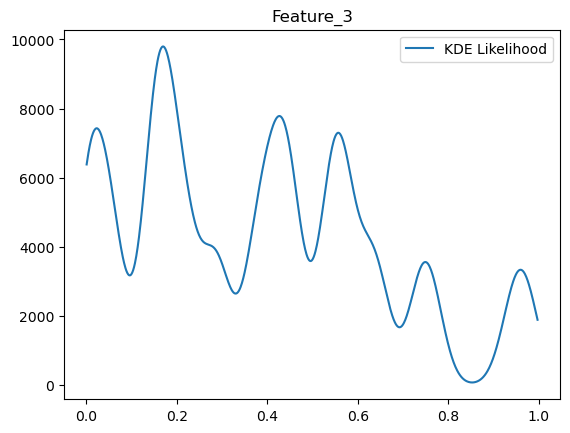

In [10]:
# Plots the KDE likelihood for each feature
for feature in train_data.columns:
    if feature == 'Label' : continue
    plotKDELikelihood(train_data, feature)
    plt.legend()
    plt.title(feature)
    plt.show()

#### KDE

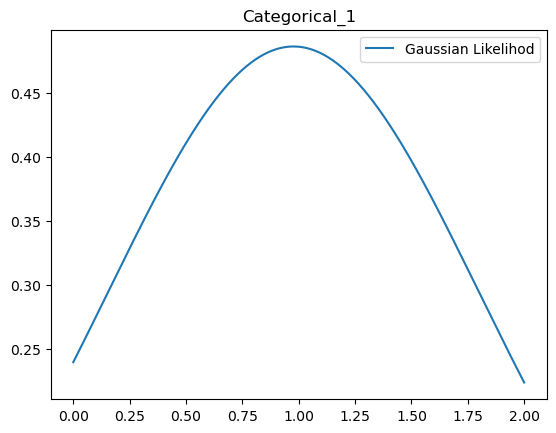

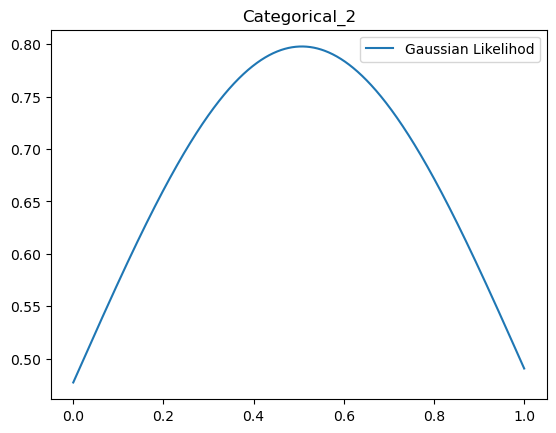

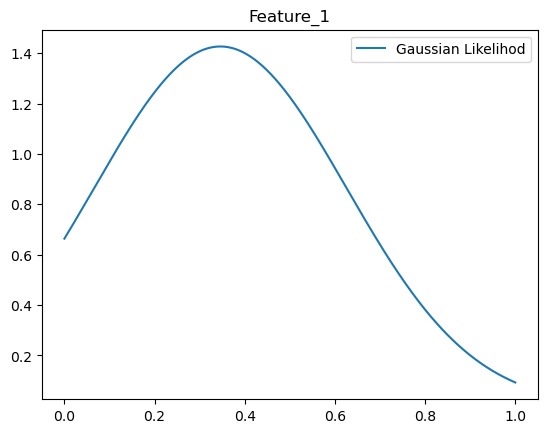

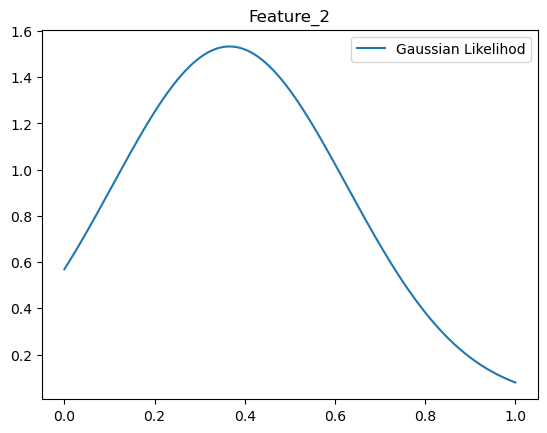

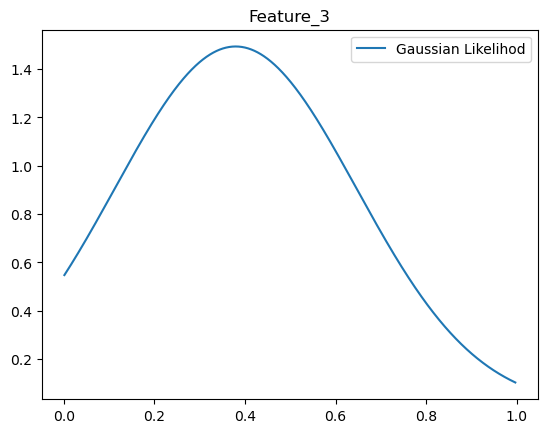

In [11]:
# Plots the Gaussian likelihood for each feature
for feature in train_data.columns:
    if feature == 'Label' : continue
    plotGaussianLikelihood(train_data, feature)
    plt.legend()
    plt.title(feature)
    plt.show()

### Plotting the classwise likelihoods

#### Gaussian

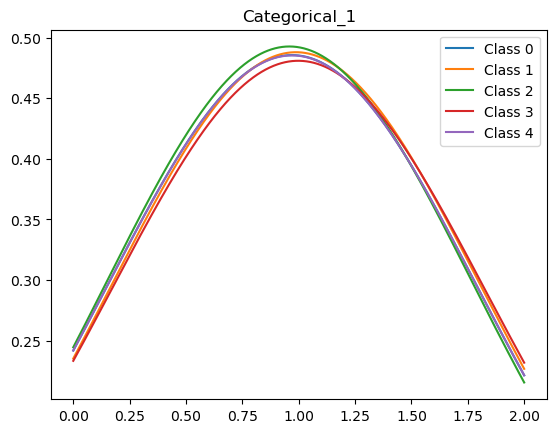

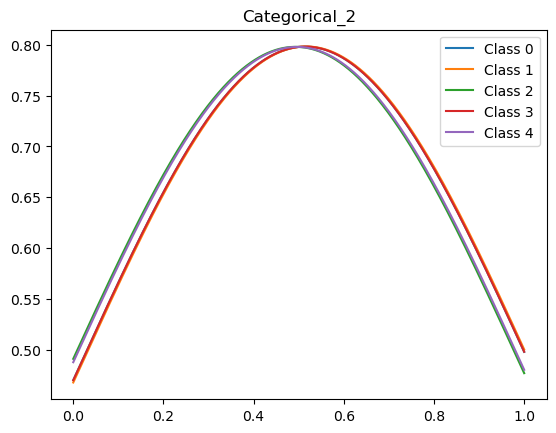

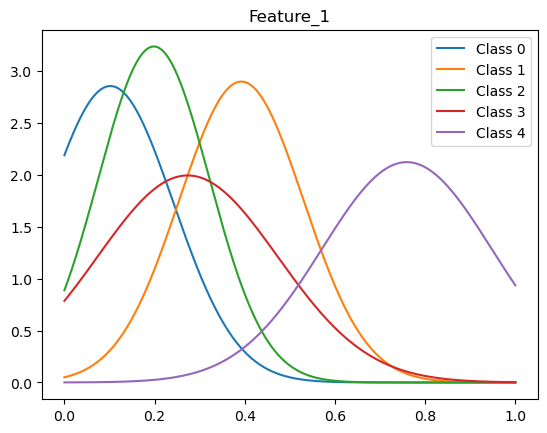

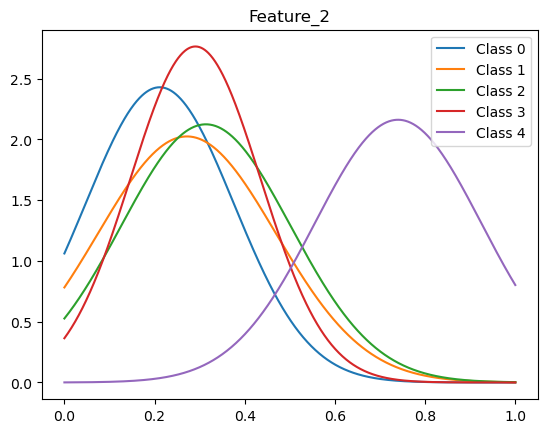

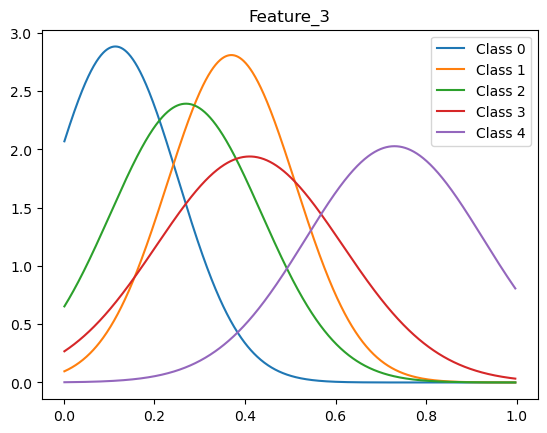

In [12]:
# Plots the classwise Gaussian likelihood for each feature
for feature in train_data.columns:
    if feature == 'Label' : continue
    for class_ in classes:
        plotGaussianLikelihoodClasswise(train_data, feature, class_)
    plt.legend()
    plt.title(feature)
    plt.show()

#### KDE

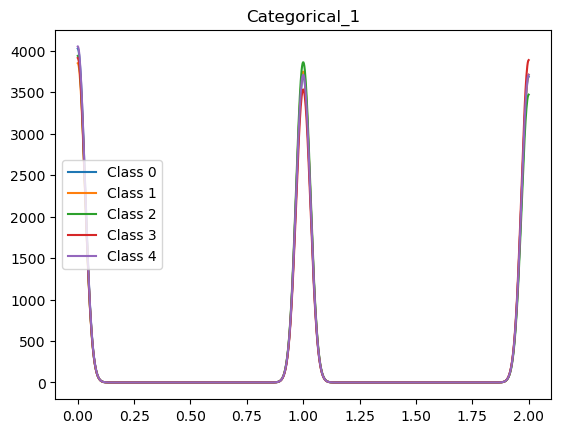

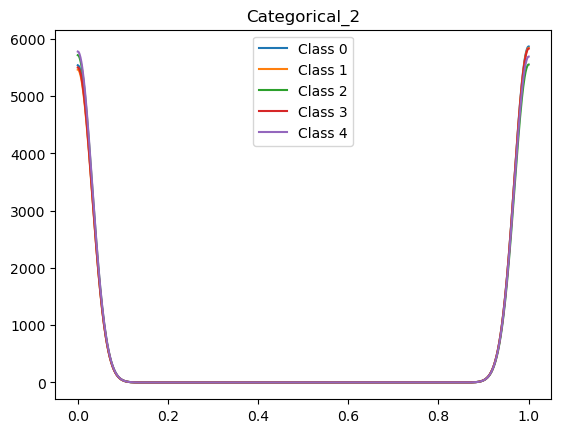

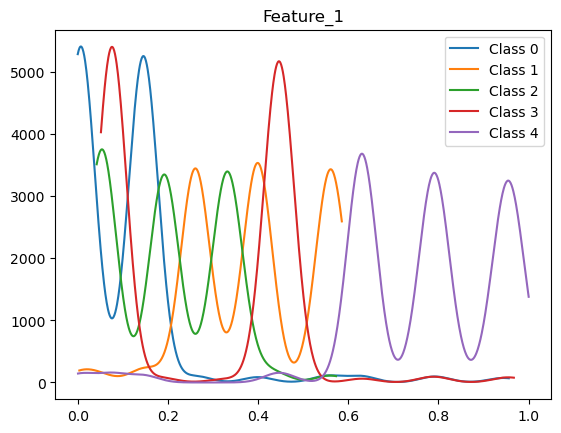

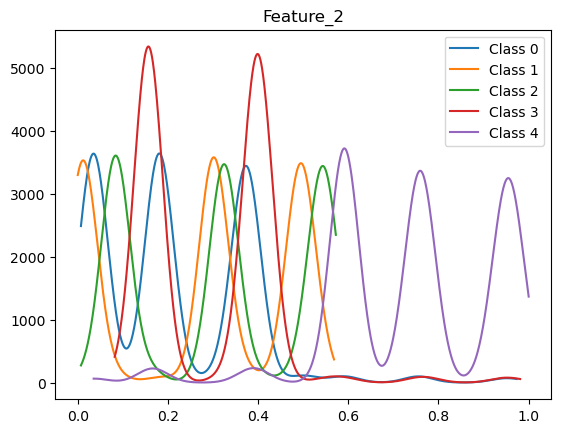

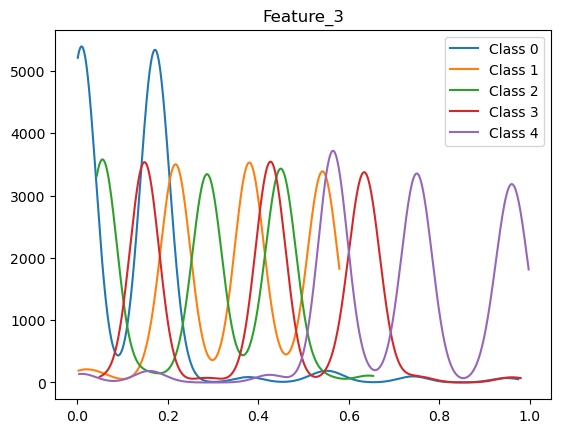

In [13]:
# Plots the classwise KDE likelihood for each feature
for feature in train_data.columns:
    if feature == 'Label' : continue
    for class_ in classes:
        plotKDELikelihoodClasswise(train_data, feature, class_)
    plt.legend()
    plt.title(feature)
    plt.show()

### Calculating the accuracy of both the models

#### Gaussian

In [14]:
# Calculates the accuracy of the gaussian naïve bayes 
accuracy = 0
for i in range(len(test_data)):
    row = test_data.iloc[i] 
    predictions = []
    
    for class_ in classes:     
        total_likelihood = 1
        prior_prob = len(test_data[test_data['Label']==class_])/len(test_data)
        
        for feature in test_data.columns:
            if feature == 'Label': continue
            total_likelihood *= getGaussianLikelihoodClasswise(row[feature], test_data, feature, class_)
    
        predictions.append(total_likelihood*prior_prob)
    class_pred = np.argmax(predictions)
    if class_pred == row['Label']:
        accuracy += 1

print("Accuracy of Naive Bayes with Gaussian :", 100*accuracy/len(test_data), "%")

Accuracy of Naive Bayes with Gaussian : 60.6 %


#### KDE

In [15]:
# Calculates the accuracy of the KDE naïve bayes
accuracy = 0
for i in range(len(test_data)):
    row = test_data.iloc[i]
    predictions = []
    
    for class_ in classes:     
        total_likelihood = 1
        prior_prob = len(test_data[test_data['Label']==class_])/len(test_data)
        
        for feature in test_data.columns:
            if feature == 'Label': continue
            total_likelihood *= getKDELikelihoodClasswise(row[feature], test_data, feature, class_)

        predictions.append(total_likelihood*prior_prob)
    class_pred = np.argmax(predictions)
    if class_pred == row['Label']:
        accuracy += 1

print("Accuracy of Naive Bayes with KDE :", 100*accuracy/len(test_data), "%")

Accuracy of Naive Bayes with KDE : 96.0 %
